In [1]:
#http://machinelearninguru.com/deep_learning/data_preparation/hdf5/hdf5.html
#https://www.kaggle.com/crawford/resize-and-save-images-as-hdf5-256x256

import os
from skimage import io
import numpy as np
import h5py
from PIL import Image

In [2]:
folder = "test_images/"
files = os.listdir(folder)
hdf5_path = 'test_dataset.hdf5'

#n=len(files)
n=len(files)

#Check the order of data and chose proper data shape to save images
train_shape = (n, 256, 256, 3)
test_shape = (n,256,256)

hdf5_file = h5py.File(hdf5_path, mode='w')
hdf5_file.create_dataset(name="test_img", 
                         shape=train_shape, 
                         compression=None)

hdf5_file.create_dataset(name="test_labels", 
                         shape=test_shape,
                         compression=None)

for i,file_name in enumerate(files):
    
    #Read the images
    rgb_img = Image.open(folder+file_name)
    rgb_img = rgb_img.resize((256,256))
    
    #Convert to grayscale
    gray_img = rgb_img.convert('L')
    
    hdf5_file["test_img"][i, ...] = rgb_img
    hdf5_file["test_labels"][i, ...] = gray_img

hdf5_file.close()

In [3]:
n

31

In [10]:
#https://stackoverflow.com/questions/41627147/how-can-i-visualise-an-image-in-h5-format-data

import h5py
import numpy as np

hdf5_path = 'test_imgs_feat_v2.hdf5'
subtract_mean = False

# open the hdf5 file
hdf5_file = h5py.File(hdf5_path, "r")

#Correct
hdf5_file.items()

ItemsViewHDF5(<HDF5 file "test_imgs_feat_v2.hdf5" (mode r)>)

In [20]:
freq4=np.array(hdf5_file["feat"])

31

In [6]:
import imageio
import numpy as np
import h5py

n=25

#Extracting the images
dset_img = hdf5_file["test_img"][n]
data_img = np.array(dset_img[:,:,:])
file_img = 'test_img.png'
imageio.imwrite(file_img, data_img)

#Extracting the image labels
dset_labels = hdf5_file["test_labels"][n]
data_labels = np.array(dset_labels[:,:])
file_labels = 'test_labels.png'
imageio.imwrite(file_labels, data_labels)

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [7]:
#Read the images
rgb_img = Image.open("test10.jpg")
gray_img = rgb_img.convert('L')

In [8]:
rgb_img.size

(306, 218)

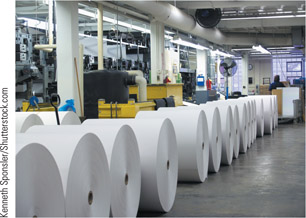

In [9]:
rgb_img